In [78]:
%matplotlib inline
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
from operator import itemgetter
from IPython.display import display
import matplotlib.pyplot as plt
import spacy
from spacy import en

In [79]:
df = pd.read_csv('/Users/vatsan/Downloads/Emails.csv',encoding='utf-8')
df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [80]:
sent_from = sorted(Counter(df['MetadataFrom'].values).items(),key=itemgetter(1),reverse=True)
display(pd.DataFrame(sent_from,columns=['sent_from','#emails']))

,sent_from,#emails
0,H,1906
1,"Abedin, Huma",1380
2,"Mills, Cheryl D",1146
3,"Sullivan, Jacob J",750
4,sbwhoeop,316
5,"Jiloty, Lauren C",302
6,NaN,157
7,"Valmoro, Lona J",146
8,"Slaughter, Anne-Marie",127
9,"Verma, Richard R",115


In [81]:
sent_to = sorted(Counter(df['MetadataTo'].values).items(),key=itemgetter(1),reverse=True)
display(pd.DataFrame(sent_to,columns=['sent_to','#emails']))

,sent_to,#emails
0,H,5370
1,abedinh@state.gov,337
2,millscd@state.gov,311
3,sullivanjj@state.gov,297
4,NaN,255
5,JilotyLC@state.gov,231
6,ValmoroLJ@state.gov,141
7,"Abedin, Huma",77
8,preines,58
9,sbwhoeop,48


In [83]:
nlp = spacy.load('en')

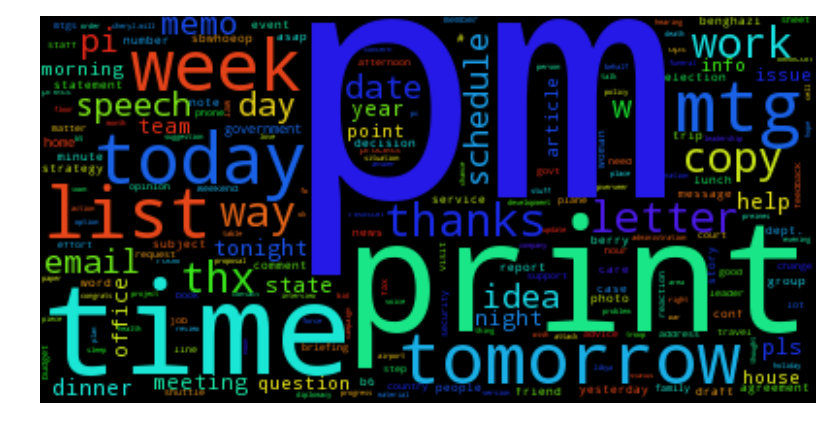

In [97]:
emails_from_hillary = df[df['MetadataFrom']=='H']
hillary_email_body = emails_from_hillary['ExtractedBodyText']
docs = []
for d in hillary_email_body.values:
    doc = []
    for token in nlp(unicode(d)):
        if(token.pos_  in ['NOUN'] and token.lemma_ not in ('nan','h') and token.lemma_ not in en.STOPWORDS):
            doc.append(token.lemma_.lower())
    docs.append(doc)
term_freq = Counter([t for d in docs for t in d]).items()
doc_freq = [Counter(d) for d in docs]
doc_freq_dict = {}
for d in range(len(doc_freq)):
    for t,f in doc_freq[d].items():
        if(t in doc_freq_dict.keys()):
            doc_freq_dict[t].append(d)
        else:
            doc_freq_dict[t] = [d]

for t in doc_freq_dict.keys():
    doc_freq_dict[t] = len(set(doc_freq_dict[t]))
wc = WordCloud().generate_from_frequencies([(t,f) for t,f in term_freq if doc_freq_dict[t] > 1 and doc_freq_dict[t] <= 0.95*len(doc_freq)])
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

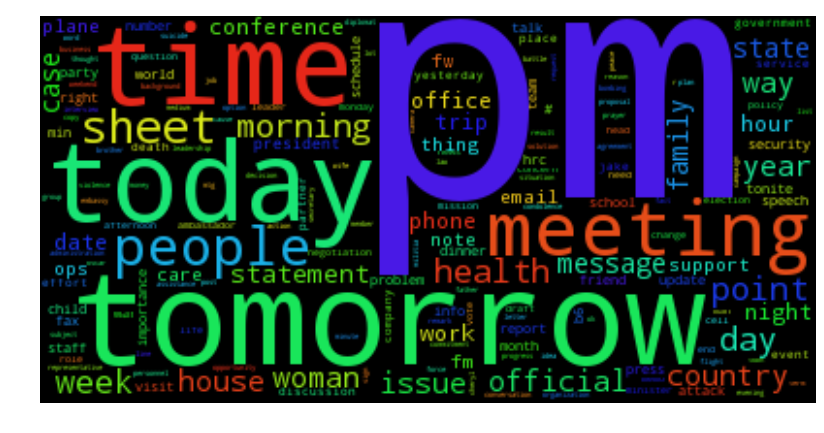

In [98]:
emails_from_hillary = df[df['MetadataFrom']=='Abedin, Huma']
hillary_email_body = emails_from_hillary['ExtractedBodyText']
docs = []
for d in hillary_email_body.values:
    doc = []
    for token in nlp(unicode(d)):
        if(token.pos_  in ['NOUN'] and token.lemma_ not in ('nan','h') and token.lemma_ not in en.STOPWORDS):
            doc.append(token.lemma_.lower())
    docs.append(doc)
term_freq = Counter([t for d in docs for t in d]).items()
doc_freq = [Counter(d) for d in docs]
doc_freq_dict = {}
for d in range(len(doc_freq)):
    for t,f in doc_freq[d].items():
        if(t in doc_freq_dict.keys()):
            doc_freq_dict[t].append(d)
        else:
            doc_freq_dict[t] = [d]

for t in doc_freq_dict.keys():
    doc_freq_dict[t] = len(set(doc_freq_dict[t]))
wc = WordCloud().generate_from_frequencies([(t,f) for t,f in term_freq if doc_freq_dict[t] > 1 and doc_freq_dict[t] <= 0.95*len(doc_freq)])
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()